# Loan Data from Prosper Exploration
## by Khaled Belal

## Investigation Overview

### I wanted to answer these questions

<ol>
<li>What factors affect a loan’s outcome status?

<li>What about the APR?

<li>What happents to the features over the years?
</ol>

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each 
loan, including loan amount, borrower rate (or interest rate), 
current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
new_load_df = pd.read_csv('CleanedLoanData.csv')
new_load_df

,ListingNumber,ListingCreationDate,Term,BorrowerAPR,BorrowerRate,EstimatedEffectiveYield,ProsperRating (Alpha),IsBorrowerHomeowner,CurrentlyInGroup,EmploymentStatus,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount
0,193129,2007-08-26 19:09:29.263,36,0.16516,0.1580,0.00000,before 2009 (not Rated),True,True,Self-employed,3083.333333,330.43,9425
1,1209647,2014-02-27 08:28:07.900,36,0.12016,0.0920,0.07960,A,False,False,Employed,6125.000000,318.93,10000
2,81716,2007-01-05 15:00:47.090,36,0.28269,0.2750,0.00000,before 2009 (not Rated),False,True,Not available,2083.333333,123.32,3001
3,658116,2012-10-22 11:02:35.010,36,0.12528,0.0974,0.08490,A,True,False,Employed,2875.000000,321.45,10000
4,909464,2013-09-14 18:38:39.097,36,0.24614,0.2085,0.18316,D,True,False,Employed,9583.333333,563.97,15000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663,36,0.22354,0.1864,0.16490,C,True,False,Employed,4333.333333,364.74,10000
113933,537216,2011-11-03 20:42:55.333,36,0.13220,0.1110,0.10070,A,True,False,Employed,8041.666667,65.57,2000
113934,1069178,2013-12-13 05:49:12.703,60,0.23984,0.2150,0.18828,D,True,False,Employed,2875.000000,273.35,10000
113935,539056,2011-11-14 13:18:26.597,60,0.28408,0.2605,0.24450,C,True,False,Full-time,3875.000000,449.55,15000


In [3]:
new_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingNumber            113937 non-null  int64  
 1   ListingCreationDate      113937 non-null  object 
 2   Term                     113937 non-null  int64  
 3   BorrowerAPR              113937 non-null  float64
 4   BorrowerRate             113937 non-null  float64
 5   EstimatedEffectiveYield  113937 non-null  float64
 6   ProsperRating (Alpha)    113937 non-null  object 
 7   IsBorrowerHomeowner      113937 non-null  bool   
 8   CurrentlyInGroup         113937 non-null  bool   
 9   EmploymentStatus         113937 non-null  object 
 10  StatedMonthlyIncome      113937 non-null  float64
 11  MonthlyLoanPayment       113937 non-null  float64
 12  LoanOriginalAmount       113937 non-null  int64  
dtypes: bool(2), float64(5), int64(3), object(3)
memory usage: 9

In [4]:
new_load_df.ListingCreationDate = pd.to_datetime(new_load_df.ListingCreationDate, format="%Y-%m-%d")
new_load_df.ListingCreationDate

0        2007-08-26 19:09:29.263
1        2014-02-27 08:28:07.900
2        2007-01-05 15:00:47.090
3        2012-10-22 11:02:35.010
4        2013-09-14 18:38:39.097
                   ...          
113932   2013-04-14 05:55:02.663
113933   2011-11-03 20:42:55.333
113934   2013-12-13 05:49:12.703
113935   2011-11-14 13:18:26.597
113936   2014-01-15 09:27:37.657
Name: ListingCreationDate, Length: 113937, dtype: datetime64[ns]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1: Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [5]:
#We devided the numerical and catagorical features because we will need  to use it
#by looping on the lists

numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield'
                , 'StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount']
categoric_vars = ['IsBorrowerHomeowner', 'ProsperRating (Alpha)','EmploymentStatus']

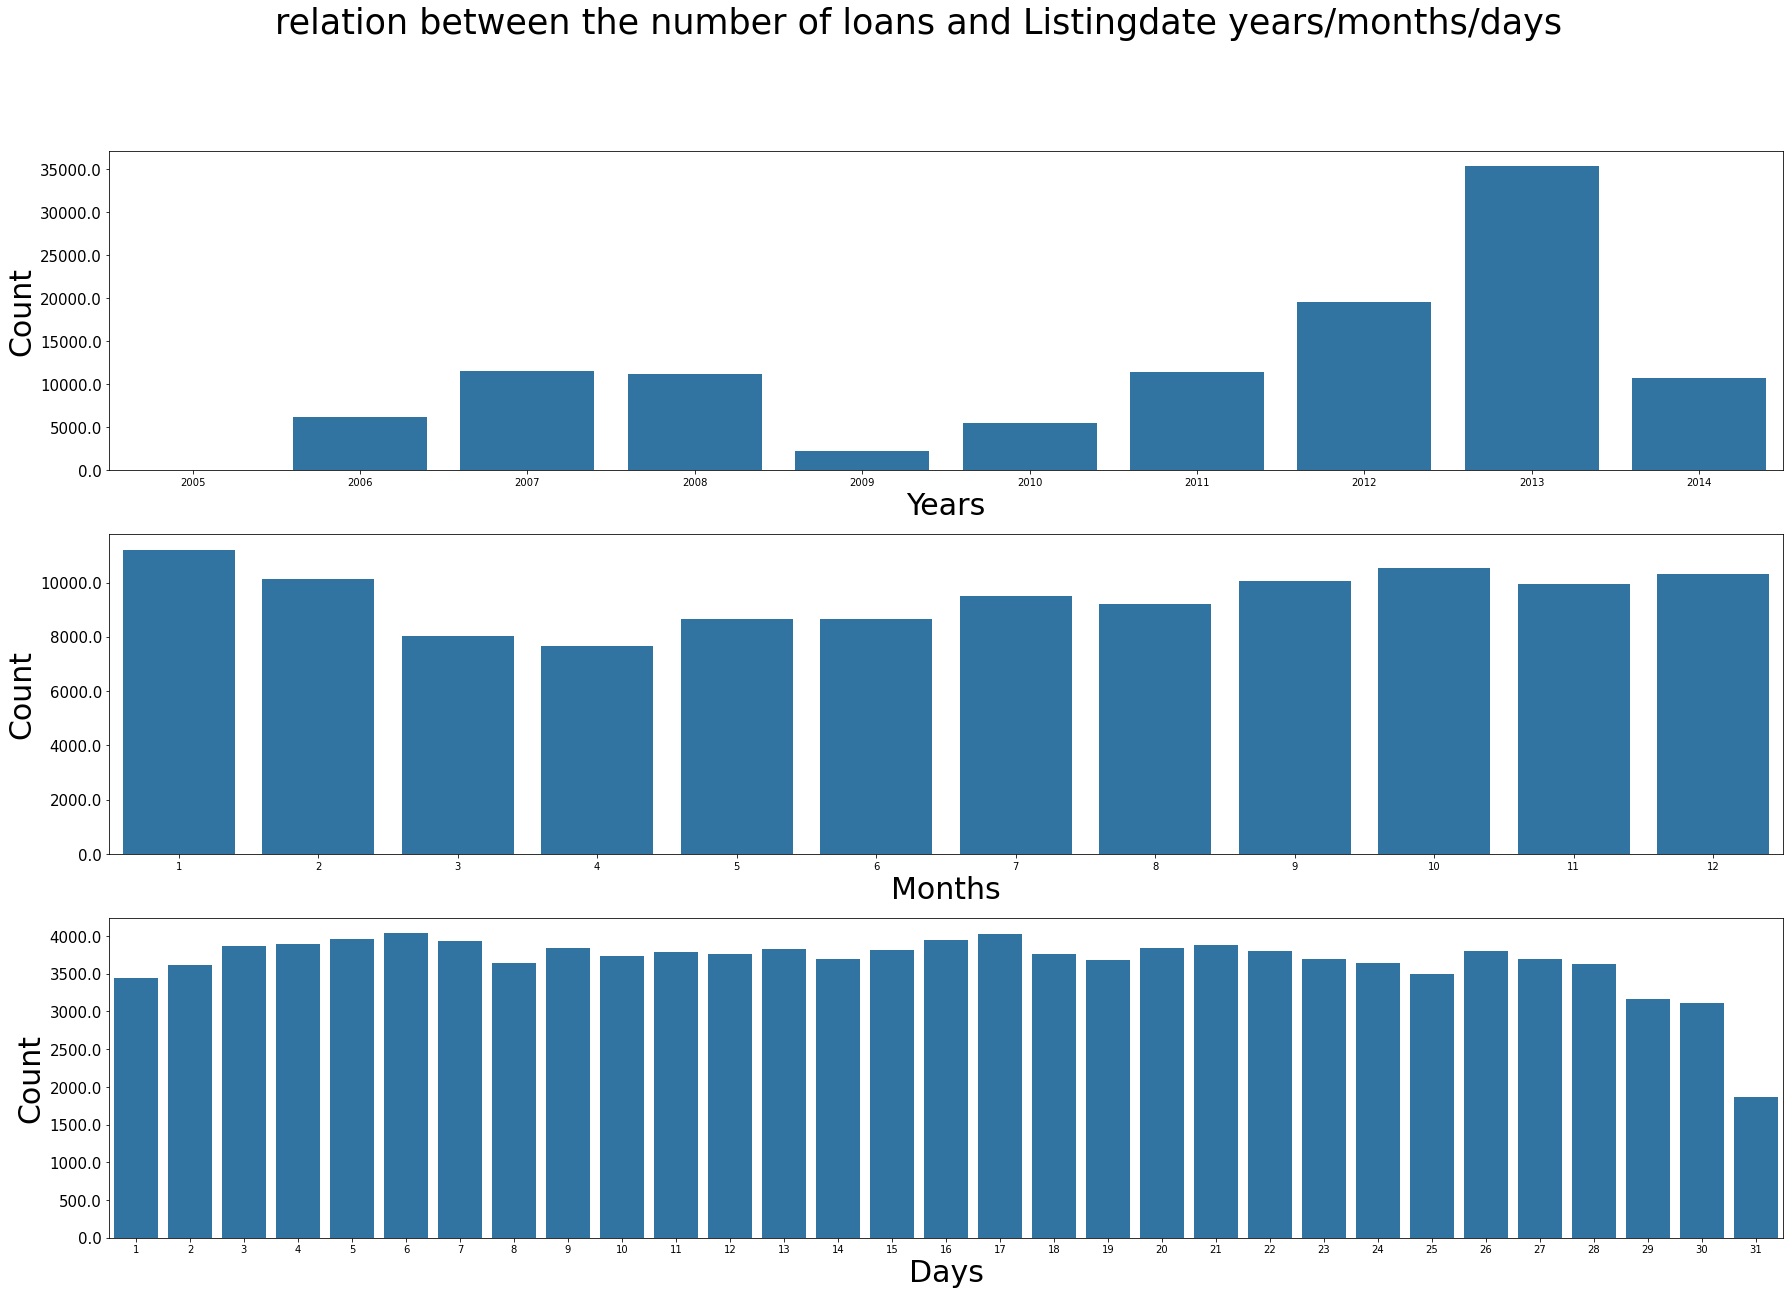

In [6]:
#Here, we study the relation between the number of loans and Listingdate
# the first graph is for years, the second graph is for months and the last one is for days


date = [new_load_df.ListingCreationDate.dt.year,new_load_df.ListingCreationDate.dt.month
        ,new_load_df.ListingCreationDate.dt.day]

dateN = ['Years','Months','Days']

fig, ax = plt.subplots(nrows = 3 , figsize = [30,20]);
fig.suptitle("relation between the number of loans and Listingdate years/months/days",fontsize=35);
for i in range(len(date)):
    
    sb.countplot(x=date[i], data=new_load_df, ax = ax[i], color=sb.color_palette()[0]);
    ax[i].set_xlabel(dateN[i],fontsize=30);
    ax[i].set_ylabel("Count",fontsize=30);
    
    ax[i].set_yticklabels(ax[i].get_yticks(), size = 15);

plt.show()

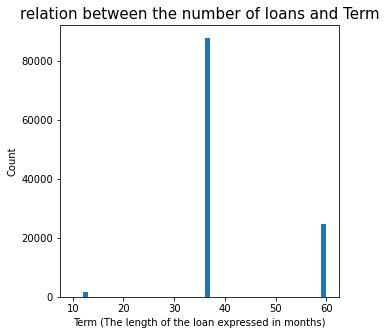

In [7]:
# Now let's study the Term
bins = np.arange(10, new_load_df.Term.max()+0.005, 1)
plt.figure(figsize=[5, 5])
plt.hist(data = new_load_df, x = 'Term',bins=bins);
plt.xlabel('Term (The length of the loan expressed in months)');
plt.ylabel('Count');
plt.title("relation between the number of loans and Term",fontsize=15);

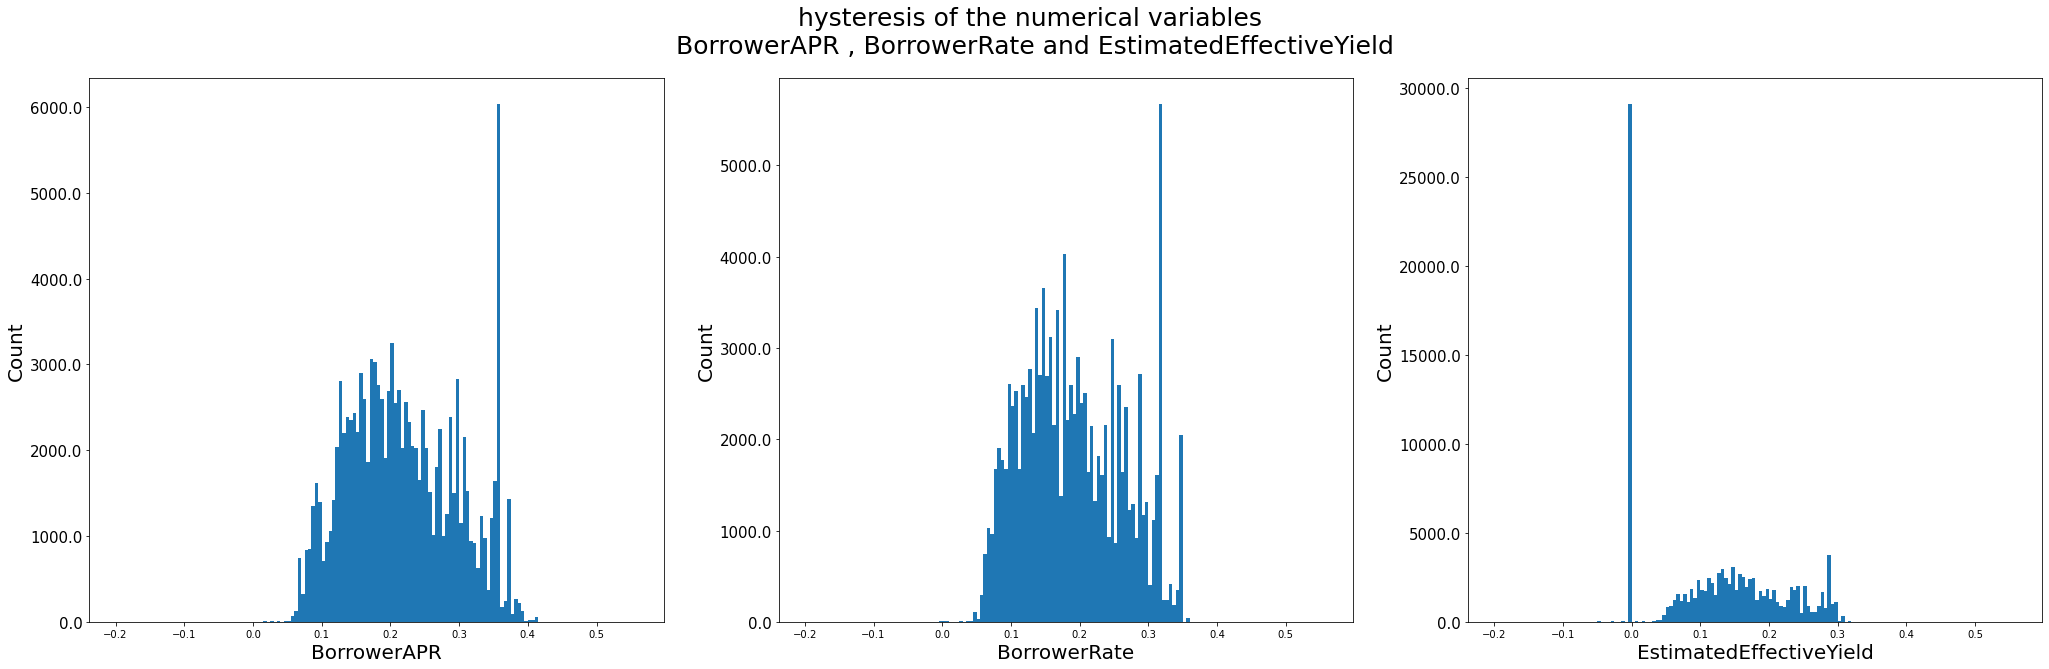

In [8]:
# Now let's study the BorrowerAPR and BorrowerRate and EstimatedEffectiveYield
bins = np.arange(-.2, new_load_df.BorrowerAPR.max()+0.05, 0.005);
vars=['BorrowerAPR','BorrowerRate','EstimatedEffectiveYield'];

fig, ax = plt.subplots(ncols = 3 , figsize = [35,10]);
fig.suptitle("hysteresis of the numerical variables \nBorrowerAPR , BorrowerRate and EstimatedEffectiveYield",fontsize=25);

for i in range(len(vars)):
    var = vars[i];
    ax[i].hist(data = new_load_df, x = var, bins = bins);        
        
    ax[i].set_xlabel(var,fontsize=20);
    ax[i].set_ylabel("Count",fontsize=20);
    ax[i].set_yticklabels(ax[i].get_yticks(), size = 15);

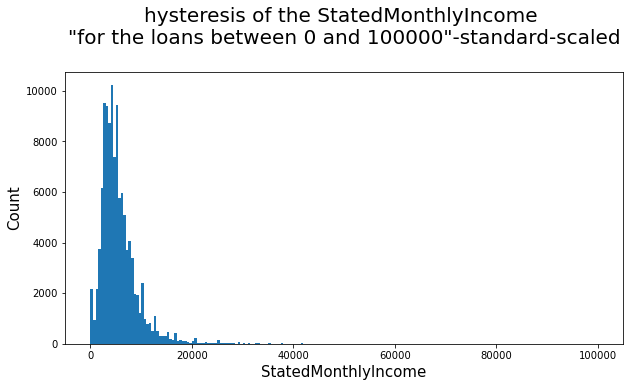

In [9]:
# Now let's study the StatedMonthlyIncome for the loans between 0 and 100000 
bins = np.arange(0, 100001, 500)
plt.figure(figsize=[10, 5])


plt.hist(data = new_load_df, x = 'StatedMonthlyIncome', bins=bins);
plt.title("hysteresis of the StatedMonthlyIncome \n\"for the loans between 0 and 100000\"-standard-scaled\n",fontsize=20);
plt.xlabel('StatedMonthlyIncome',fontsize=15);
plt.ylabel('Count',fontsize=15);

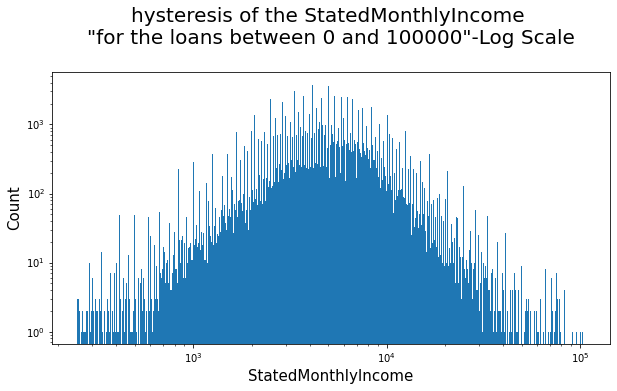

In [10]:
logbins = 10 ** np.arange(2.4, np.log10(100000)+0.025, 0.005)
plt.figure(figsize=[10, 5])

plt.hist(data = new_load_df, x = 'StatedMonthlyIncome',log=True ,bins=logbins);
plt.title("hysteresis of the StatedMonthlyIncome \n\"for the loans between 0 and 100000\"-Log Scale\n",fontsize=20);
plt.xlabel('StatedMonthlyIncome',fontsize=15);
plt.xscale('log')
plt.ylabel('Count',fontsize=15);

plt.show()

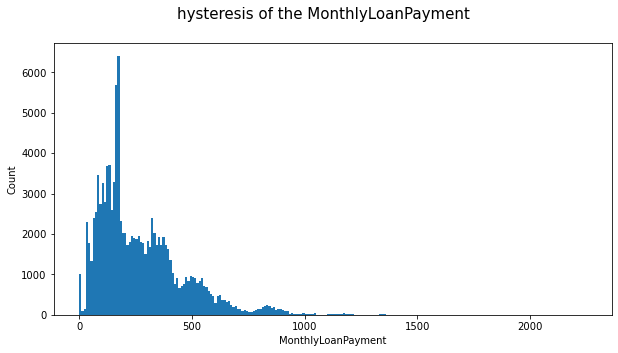

In [11]:
# Now let's study the MonthlyLoanPayment

bins = np.arange(0, 2252, 10)
plt.figure(figsize=[10, 5])
plt.hist(data = new_load_df, x = 'MonthlyLoanPayment', bins=bins);
plt.suptitle("hysteresis of the MonthlyLoanPayment",fontsize=15);
plt.xlabel('MonthlyLoanPayment',fontsize=10);
plt.ylabel('Count',fontsize=10);

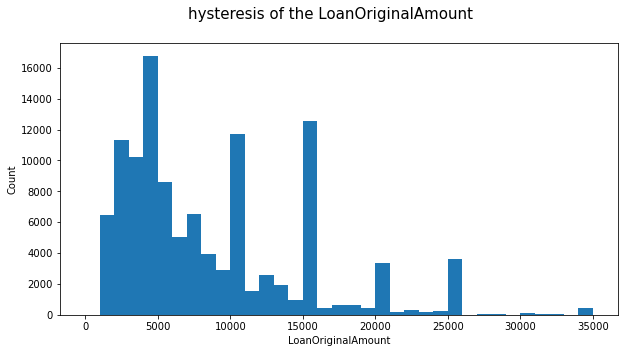

In [12]:
# Now let's study the LoanOriginalAmount
bins = np.arange(0, 35001, 1000)
plt.figure(figsize=[10, 5])
plt.hist(data = new_load_df, x = 'LoanOriginalAmount', bins=bins);
plt.suptitle("hysteresis of the LoanOriginalAmount",fontsize=15);
plt.xlabel('LoanOriginalAmount',fontsize=10);
plt.ylabel('Count',fontsize=10);

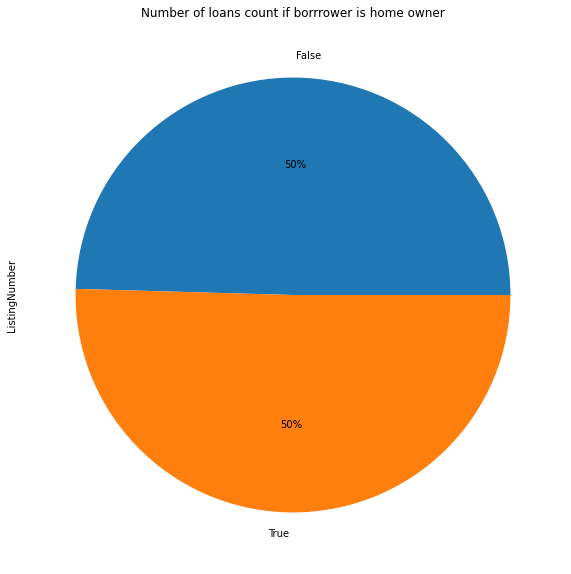

In [13]:
#pie plot of homeowner count
ax = new_load_df.groupby(new_load_df.IsBorrowerHomeowner)['ListingNumber'].count().\
plot(kind = 'pie',figsize=(10,10),title='Number of loans count if borrrower is home owner',autopct='%1.0f%%')

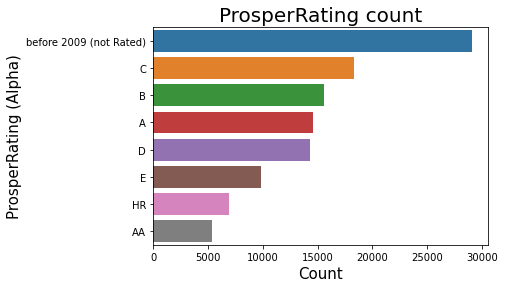

In [14]:
#Here, we study the relation between the number of loans and 'ProsperRating (Alpha)'
# the first graph is for years, the second graph is for months and the last one is for days

    
sb.countplot(y='ProsperRating (Alpha)', data=new_load_df,order=new_load_df['ProsperRating (Alpha)'].value_counts().index)
plt.ylabel('ProsperRating (Alpha)',fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.title("ProsperRating count",fontsize=20)
plt.show()

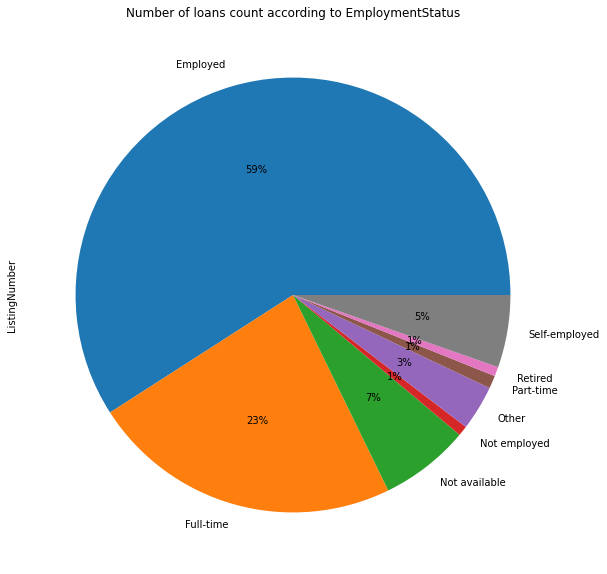

In [15]:
#pie plot EmploymentStatus
ax = new_load_df.groupby(new_load_df.EmploymentStatus)['ListingNumber'].count().\
plot(kind = 'pie',figsize=(10,10),title='Number of loans count according to EmploymentStatus',autopct='%1.0f%%')

## Visualization 2: Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

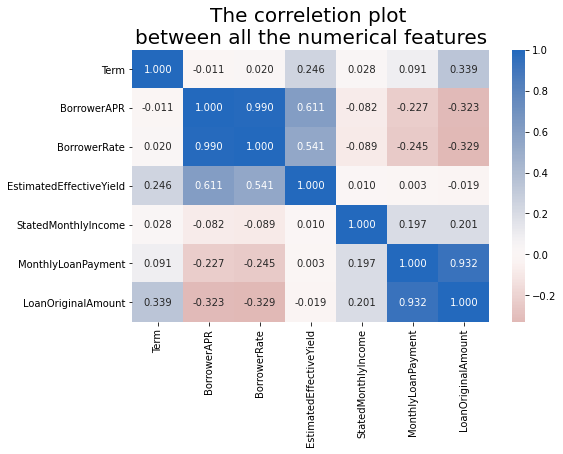

In [16]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(new_load_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("The correletion plot \nbetween all the numerical features",size=20)
plt.show()

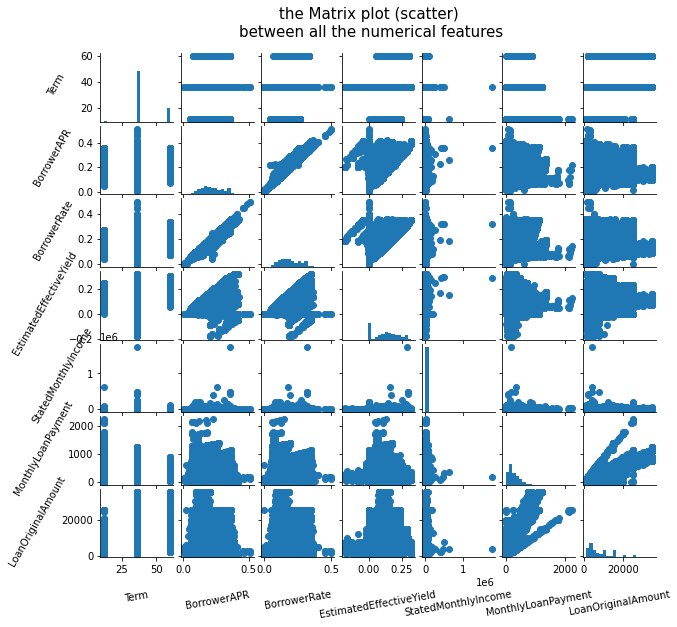

In [17]:
# plot matrix
g = sb.PairGrid(data = new_load_df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("the Matrix plot (scatter) \nbetween all the numerical features",size=15)
g.fig.set_size_inches(8,8)

# Iterate thorugh each axis
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), rotation = 10,labelpad=15)
    ax.set_ylabel(ax.get_ylabel(), rotation = 60,labelpad=20)

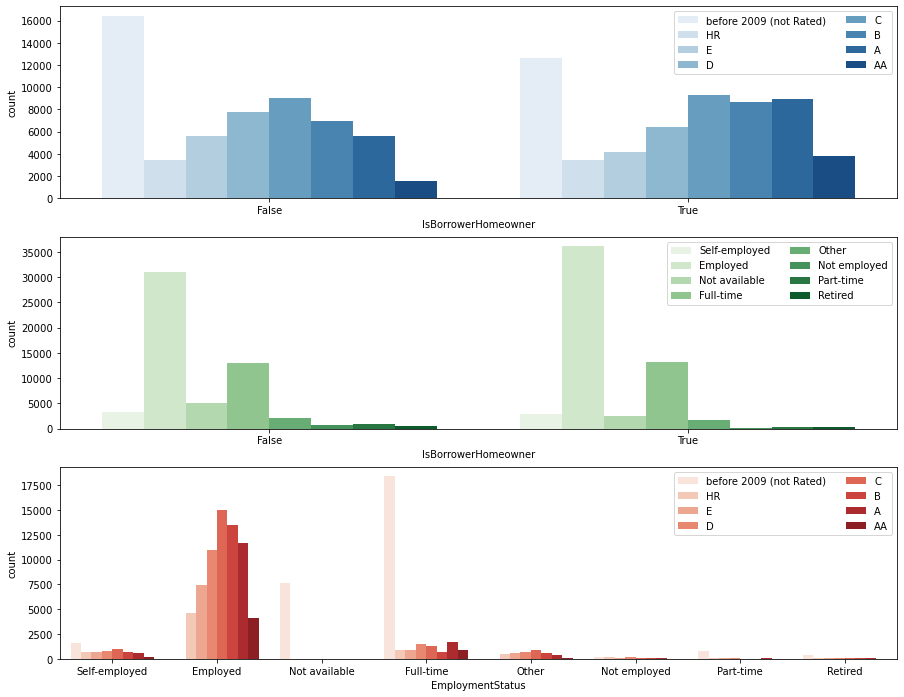

In [18]:
# plot catigorical va catigorical

plt.figure(figsize = [15, 12])

# subplot 1: IsBorrowerHomeowner vs ProsperRating
ax = plt.subplot(3, 1, 1)
sb.countplot(data = new_load_df, x = 'IsBorrowerHomeowner', hue = 'ProsperRating (Alpha)', palette = 'Blues'
             , hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA'])
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 2: IsBorrowerHomeowner vs. EmploymentStatus
ax = plt.subplot(3, 1, 2)
sb.countplot(data = new_load_df, x = 'IsBorrowerHomeowner', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: EmploymentStatus vs. ProsperRating
ax = plt.subplot(3, 1, 3)
sb.countplot(data = new_load_df, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds'
             ,hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA'])
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

g.fig.suptitle("plot catigorical features against categorical features",size=20)
plt.show();
plt.show()

## Visualization 3: Multivariate Exploration

> We will focus on the relationship between the numerical features: LoanOriginalAmount and BorrowerAPR
and the catagorical: ProsperRating and EmploymentStatus over the years

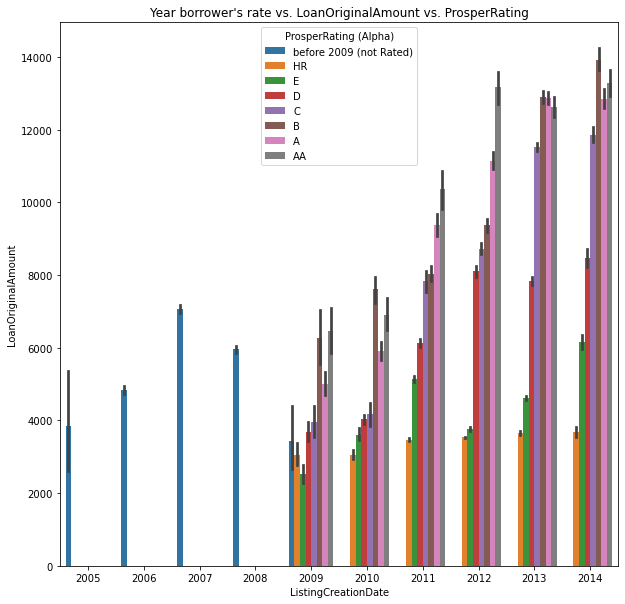

In [19]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'LoanOriginalAmount'
           , hue = 'ProsperRating (Alpha)',hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA']);
plt.title('Year borrower\'s rate vs. LoanOriginalAmount vs. ProsperRating');

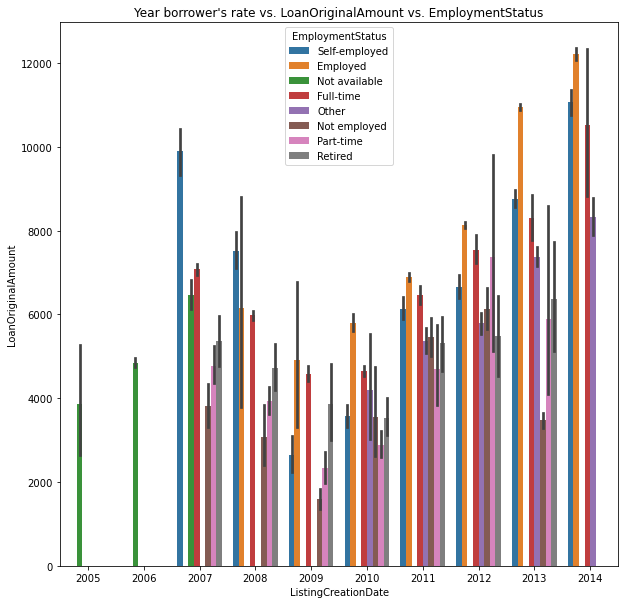

In [20]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'LoanOriginalAmount'
           , hue = 'EmploymentStatus');
plt.title('Year borrower\'s rate vs. LoanOriginalAmount vs. EmploymentStatus');

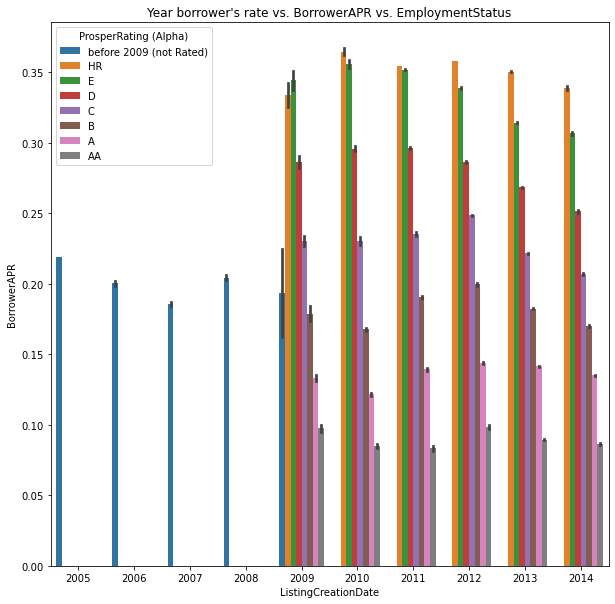

In [21]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'BorrowerAPR'
           , hue = 'ProsperRating (Alpha)',hue_order= ['before 2009 (not Rated)','HR','E','D','C','B','A','AA']);
plt.title('Year borrower\'s rate vs. BorrowerAPR vs. EmploymentStatus');

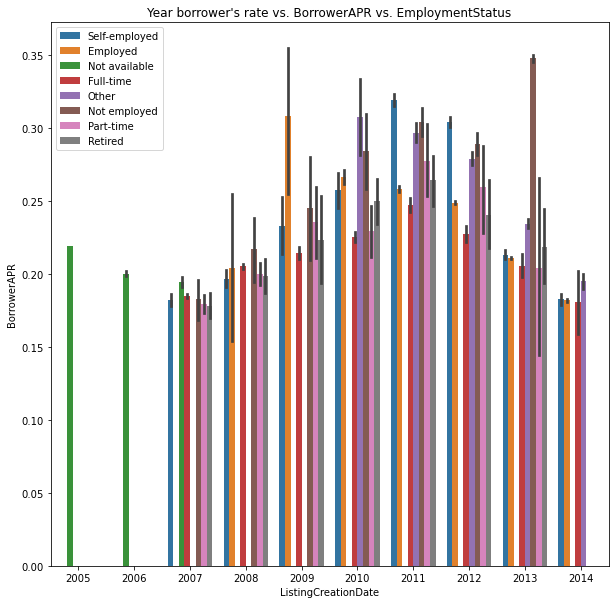

In [22]:
plt.figure(figsize=[10, 10]);
sb.barplot(data = new_load_df, x = new_load_df.ListingCreationDate.dt.year, y = 'BorrowerAPR'
           , hue = 'EmploymentStatus');
plt.legend(loc = 2, ncol = 1);
plt.title('Year borrower\'s rate vs. BorrowerAPR vs. EmploymentStatus');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [23]:
!jupyter nbconvert "slide_deck.ipynb" --to slides --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 982252 bytes to slide_deck.slides.html
